<div style='font-size:36px; font-weight:bold; text-align:center;'>NBA 2021-22 season data analysis</div>

<img style='display: block; margin-left: auto; margin-right: auto; width: 50%;' src='https://logospng.org/download/nba/logo-nba-256.png'>

In this notebook i'm going to grab data from the nba 2021-22 season analyze, plot and answer some interesting questions.

I'm going to web scrap from a site called basketball-reference, so shout out to them!

<hr>

First import all libs needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
df = pd.read_html(url)[0]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


There's some cleaning in this data frame to do and you will see why

In [3]:
df.set_index('Rk', inplace=True)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [4]:
df.iloc[20:30]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
17,Ryan Arcidiacono,PG,27,NYK,10,0,7.6,0.6,1.2,.500,...,NaN,0.0,0.8,0.8,0.4,0.1,0.0,0.3,0.5,1.6
18,Trevor Ariza,SF,36,LAL,24,11,19.3,1.4,4.1,.333,...,.556,0.4,3.0,3.4,1.1,0.5,0.3,0.5,0.8,4.0
19,D.J. Augustin,PG,34,TOT,55,2,16.1,1.7,4.0,.423,...,.884,0.2,1.0,1.2,1.9,0.3,0.0,1.0,0.7,5.3
19,D.J. Augustin,PG,34,HOU,34,2,15.0,1.6,4.0,.404,...,.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4
19,D.J. Augustin,PG,34,LAL,21,0,17.8,1.9,4.1,.453,...,1.000,0.2,1.1,1.3,1.6,0.3,0.0,0.5,1.0,5.3
20,Deni Avdija,SF,21,WAS,82,8,24.2,3.0,7.1,.432,...,.757,0.6,4.5,5.2,2.0,0.7,0.5,1.1,2.3,8.4
Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21,Joel Ayayi,SG,21,WAS,7,0,2.9,0.1,0.9,.167,...,NaN,0.1,0.3,0.4,0.6,0.0,0.0,0.0,0.0,0.3
22,Deandre Ayton,C,23,PHO,58,58,29.5,7.6,12.0,.634,...,.746,2.6,7.7,10.2,1.4,0.7,0.7,1.6,2.4,17.2


We don't want that divider in row 21

In [5]:
df = df[df.PTS != 'PTS']
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


This dropped 30 rows, but as you can see, there still more rows than players.

This is because some players are traded in the middle of the season and basketball-referece tracks stats from them on each team and the total for the season.

But in this analysis we only going to need the total, because otherwise it would affect the plots

In [6]:
df.iloc[10:20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
9,Jose Alvarado,PG,23,NOP,54,1,15.4,2.4,5.4,.446,...,.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
10,Justin Anderson,SF,28,TOT,16,6,19.8,2.3,5.9,.379,...,.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4
10,Justin Anderson,SF,28,CLE,3,0,15.7,1.3,2.7,.500,...,.750,0.0,2.0,2.0,2.0,0.3,0.0,0.7,1.3,4.3
10,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,.368,...,.800,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
11,Kyle Anderson,PF,28,MEM,69,11,21.5,3.0,6.8,.446,...,.638,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,.553,...,.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
13,Thanasis Antetokounmpo,SF,29,MIL,48,6,9.9,1.5,2.7,.547,...,.630,0.8,1.3,2.1,0.5,0.3,0.3,0.5,1.4,3.6
14,Carmelo Anthony,PF,37,LAL,69,3,26.0,4.6,10.5,.441,...,.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3
15,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,14.0,.391,...,.854,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3


Here, we can see 3 Justin Anderson, we going to drop it the CLE and IND ones

In [7]:
df = df.drop_duplicates('Player')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,.518,...,.469,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [8]:
df.iloc[5:15]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,.372,...,.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,.448,...,.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,.677,...,.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
9,Jose Alvarado,PG,23,NOP,54,1,15.4,2.4,5.4,.446,...,.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
10,Justin Anderson,SF,28,TOT,16,6,19.8,2.3,5.9,.379,...,.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4
11,Kyle Anderson,PF,28,MEM,69,11,21.5,3.0,6.8,.446,...,.638,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,.553,...,.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
13,Thanasis Antetokounmpo,SF,29,MIL,48,6,9.9,1.5,2.7,.547,...,.630,0.8,1.3,2.1,0.5,0.3,0.3,0.5,1.4,3.6
14,Carmelo Anthony,PF,37,LAL,69,3,26.0,4.6,10.5,.441,...,.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3


In [9]:
df.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

We also may want to convert the data types

In [10]:
cols = df.columns.drop(['Player', 'Pos', 'Tm'])
df[cols] = df[cols].apply(pd.to_numeric)
df.dtypes

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3812\126031790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].apply(pd.to_numeric)


Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

Now we can make our plots!

## Now let's plot some basic stats

Like points per game!

We'll be using a swarm plot for better visualization

And a minimum of 58 games, which is used by the nba to award the scoring title

<AxesSubplot: title={'center': 'PPG across all NBA 2022 season'}, ylabel='PTS'>

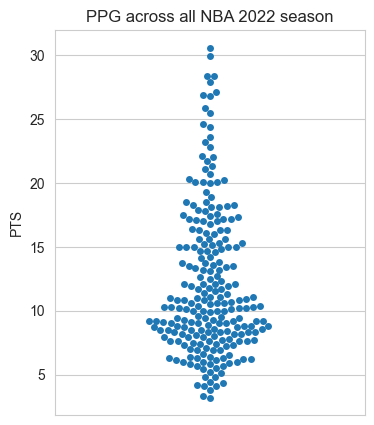

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,5))
plt.title('PPG across all NBA 2022 season')
sns.swarmplot(df.PTS[df.G >= 58])

We can see that most players fall into the 6 to the 12 points range

Also shows us the 2 elite scorers in the season that reached the 30 ppg barrier

Also a interesting note is the two players that make around 3-2 ppg but still played 58 or more games

In [12]:
df[df.G >= 58].sort_values('PTS', ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,...,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,...,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
141,Luka Dončić,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,...,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4
134,DeMar DeRozan,PF,32,CHI,76,76,36.1,10.2,20.2,0.504,...,0.877,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Frank Ntilikina,SG,23,DAL,58,5,11.8,1.5,3.8,0.399,...,0.960,0.2,1.2,1.4,1.2,0.5,0.1,0.5,1.1,4.1
545,Juan Toscano-Anderson,SF,28,GSW,73,6,13.6,1.6,3.2,0.489,...,0.571,0.4,2.0,2.4,1.7,0.7,0.2,0.9,1.6,4.1
372,Jordan McLaughlin,PG,25,MIN,62,3,14.5,1.4,3.2,0.440,...,0.750,0.4,1.2,1.5,2.9,0.9,0.2,0.6,0.9,3.8


Here we can see who are those players

### So, why stop it there when we can make a plot for every major statiscal category?

<AxesSubplot: title={'center': 'TOV'}, ylabel='TOV'>

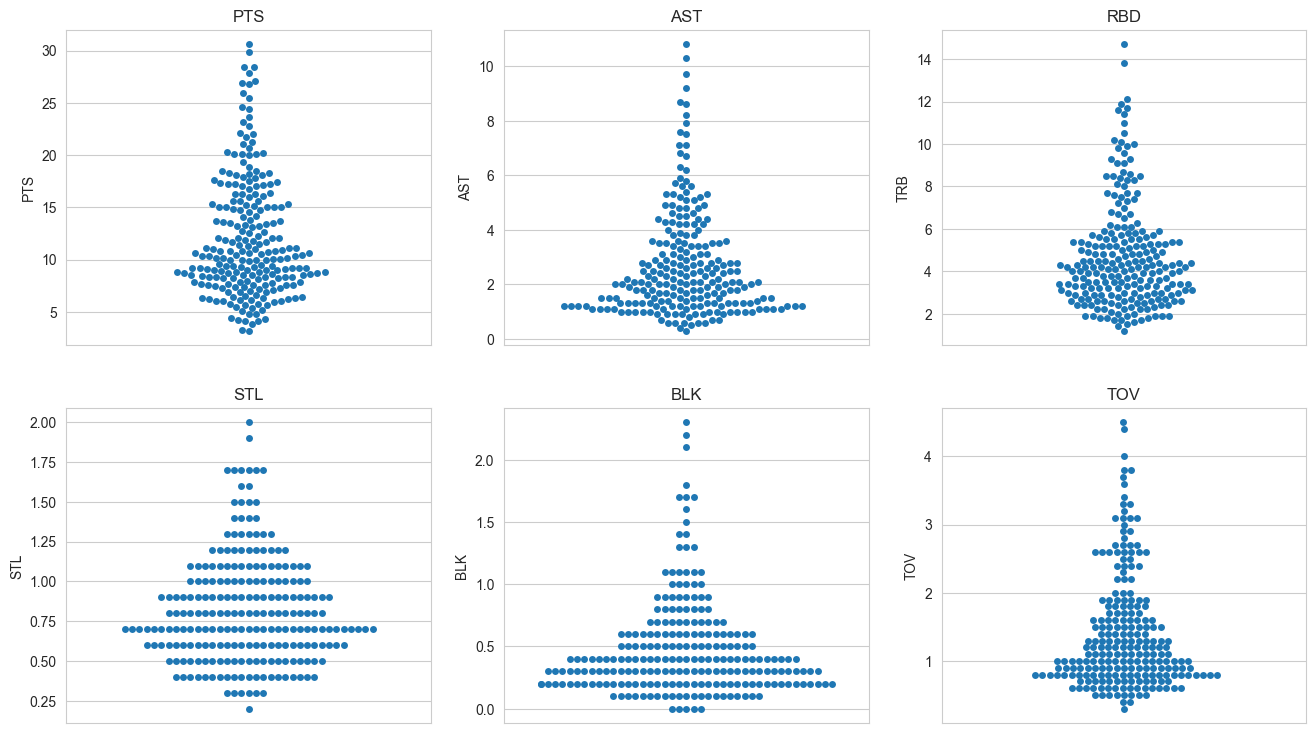

In [13]:
fig, ax = plt.subplots(2,3, figsize=(16,9))

ax[0][0].set_title('PTS')
sns.swarmplot(df.PTS[df.G >= 58], ax=ax[0][0])

ax[0][1].set_title('AST')
sns.swarmplot(df.AST[df.G >= 58], ax=ax[0][1])

ax[0][2].set_title('RBD')
sns.swarmplot(df.TRB[df.G >= 58], ax=ax[0][2])

ax[1][0].set_title('STL')
sns.swarmplot(df.STL[df.G >= 58], ax=ax[1][0])

ax[1][1].set_title('BLK')
sns.swarmplot(df.BLK[df.G >= 58], ax=ax[1][1])

ax[1][2].set_title('TOV')
sns.swarmplot(df.TOV[df.G >= 58], ax=ax[1][2])

Very interesting seeing where everyone falls and all outliers, specially in rebounds, blocks, turnovers and steals, where there are players way ahed of the pack

Also, if want to see who is these players, check basketball reference, the url is at the start of this notebook

### Since we are all fancy with plots, we can make one image showing scatter plots with correlations for every statistic

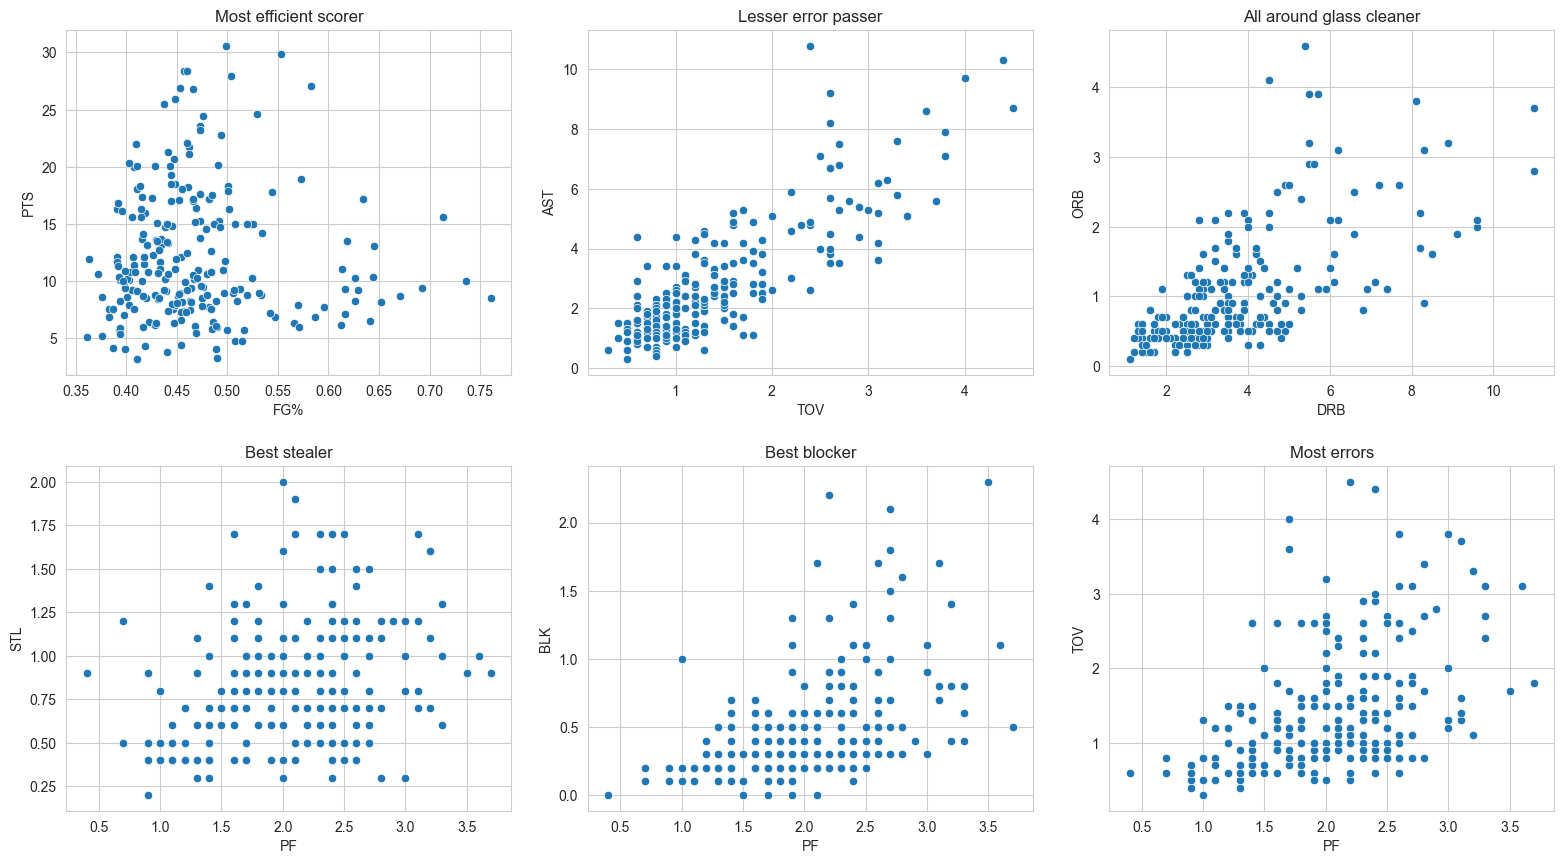

In [14]:
fig, ax = plt.subplots(2,3, figsize=(16,9))

ax[0][0].set_title('Most efficient scorer')
sns.scatterplot(df[df.G >= 58], x='FG%', y='PTS', ax=ax[0][0])

ax[0][1].set_title('Lesser error passer')
sns.scatterplot(df[df.G >= 58], x='TOV', y='AST', ax=ax[0][1])

ax[0][2].set_title('All around glass cleaner')
sns.scatterplot(df[df.G >= 58], x='DRB', y='ORB', ax=ax[0][2])

ax[1][0].set_title('Best stealer')
sns.scatterplot(df[df.G >= 58], x='PF', y='STL', ax=ax[1][0])

ax[1][1].set_title('Best blocker')
sns.scatterplot(df[df.G >= 58], x='PF', y='BLK', ax=ax[1][1])

ax[1][2].set_title('Most errors')
sns.scatterplot(df[df.G >= 58], x='PF', y='TOV', ax=ax[1][2])

plt.tight_layout(pad=2)

Now we start to really see the outliers, the ones who are ahead of the pack

### We could also make some plots for teams in general

In [15]:
url2 = 'https://www.basketball-reference.com/leagues/NBA_2022_ratings.html'
df_teams = pd.read_html(url2)[0]
df_teams

Unnamed: 0_level_0      Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk                    Team               Conf   
0                   1          Boston Celtics                  E   
1                   2            Phoenix Suns                  W   
2                   3               Utah Jazz                  W   
3                   4   Golden State Warriors                  W   
4                   5       Memphis Grizzlies                  W   
5                   6              Miami Heat                  E   
6                   7        Dallas Mavericks                  W   
7                   8         Milwaukee Bucks                  E   
8                   9      Philadelphia 76ers                  E   
9                  10         Toronto Raptors                  E   
10                 11  Minnesota Timberwolves                  W   
11                 12          Denver Nuggets                  W   
12                 13     Cleveland Cavaliers                  E   
13                 14           Atlanta Hawks                  E   
14                 15           Brooklyn Nets                  E   
15                 16       Charlotte Hornets                  E   
16                 17         New York Knicks                  E   
17                 18    Los Angeles Clippers                  W   
18                 19       San Antonio Spurs                  W   
19                 20           Chicago Bulls                  E   
20                 21    New Orleans Pelicans                  W   
21                 22      Los Angeles Lakers                  W   
22                 23          Indiana Pacers                  E   
23                 24      Washington Wizards                  E   
24                 25        Sacramento Kings                  W   
25                 26         Detroit Pistons                  E   
26                 27           Orlando Magic                  E   
27                 28   Oklahoma City Thunder                  W   
28                 29         Houston Rockets                  W   
29                 30  Portland Trail Blazers                  W   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                  Div                  W                  L   
0                   A                 51                 31   
1                   P                 64                 18   
2                  NW                 49                 33   
3                   P                 53                 29   
4                  SW                 56                 26   
5                  SE                 53                 29   
6                  SW                 52                 30   
7                   C                 51                 31   
8                   A                 51                 31   
9                   A                 48                 34   
10                 NW                 46                 36   
11                 NW                 48                 34   
12                  C                 44                 38   
13                 SE                 43                 39   
14                  A                 44                 38   
15                 SE                 43                 39   
16                  A                 37                 45   
17                  P                 42                 40   
18                 SW                 34                 48   
19                  C                 46                 36   
20                 SW                 36                 46   
21                  P                 33                 49   
22                  C                 25                 57   
23                 SE                 35                 47   
24                  P                 30                 52   
25                  C                 23                 59   
26                 SE                 22                 60   

In [16]:
df_teams.columns

MultiIndex([('Unnamed: 0_level_0',     'Rk'),
            ('Unnamed: 1_level_0',   'Team'),
            ('Unnamed: 2_level_0',   'Conf'),
            ('Unnamed: 3_level_0',    'Div'),
            ('Unnamed: 4_level_0',      'W'),
            ('Unnamed: 5_level_0',      'L'),
            ('Unnamed: 6_level_0',   'W/L%'),
            (        'Unadjusted',    'MOV'),
            (        'Unadjusted',   'ORtg'),
            (        'Unadjusted',   'DRtg'),
            (        'Unadjusted',   'NRtg'),
            (          'Adjusted',  'MOV/A'),
            (          'Adjusted', 'ORtg/A'),
            (          'Adjusted', 'DRtg/A'),
            (          'Adjusted', 'NRtg/A')],
           )

In [17]:
cols = []
for i in range(15):
    cols.append(df_teams.columns[i][1]) 

df_teams.columns = cols

In [18]:
df_teams

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Boston Celtics,E,A,51,31,0.622,7.28,115.37,107.71,7.66,7.02,115.05,107.65,7.39
1,2,Phoenix Suns,W,P,64,18,0.780,7.50,115.65,108.17,7.48,6.94,115.41,108.50,6.91
2,3,Utah Jazz,W,NW,49,33,0.598,6.04,117.68,111.52,6.16,5.67,117.63,111.84,5.79
3,4,Golden State Warriors,W,P,53,29,0.646,5.54,113.33,107.68,5.65,5.52,113.24,107.62,5.62
4,5,Memphis Grizzlies,W,SW,56,26,0.683,5.68,115.50,109.94,5.56,5.37,115.38,110.14,5.24
5,6,Miami Heat,E,SE,53,29,0.646,4.45,114.83,110.21,4.62,4.23,114.61,110.21,4.40
6,7,Dallas Mavericks,W,SW,52,30,0.634,3.30,113.82,110.27,3.55,3.12,113.76,110.41,3.35
7,8,Milwaukee Bucks,E,C,51,31,0.622,3.35,115.86,112.56,3.31,3.22,115.86,112.67,3.18
8,9,Philadelphia 76ers,E,A,51,31,0.622,2.61,114.39,111.80,2.59,2.57,114.42,111.86,2.56
9,10,Toronto Raptors,E,A,48,34,0.585,2.29,113.93,111.55,2.38,2.37,113.86,111.40,2.46


In [19]:
df_teams.set_index('Rk')

,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
Rk,,,,,,,,,,,,,,
1,Boston Celtics,E,A,51,31,0.622,7.28,115.37,107.71,7.66,7.02,115.05,107.65,7.39
2,Phoenix Suns,W,P,64,18,0.780,7.50,115.65,108.17,7.48,6.94,115.41,108.50,6.91
3,Utah Jazz,W,NW,49,33,0.598,6.04,117.68,111.52,6.16,5.67,117.63,111.84,5.79
4,Golden State Warriors,W,P,53,29,0.646,5.54,113.33,107.68,5.65,5.52,113.24,107.62,5.62
5,Memphis Grizzlies,W,SW,56,26,0.683,5.68,115.50,109.94,5.56,5.37,115.38,110.14,5.24
6,Miami Heat,E,SE,53,29,0.646,4.45,114.83,110.21,4.62,4.23,114.61,110.21,4.40
7,Dallas Mavericks,W,SW,52,30,0.634,3.30,113.82,110.27,3.55,3.12,113.76,110.41,3.35
8,Milwaukee Bucks,E,C,51,31,0.622,3.35,115.86,112.56,3.31,3.22,115.86,112.67,3.18
9,Philadelphia 76ers,E,A,51,31,0.622,2.61,114.39,111.80,2.59,2.57,114.42,111.86,2.56


Text(0, 0.5, 'Offensive Rating')

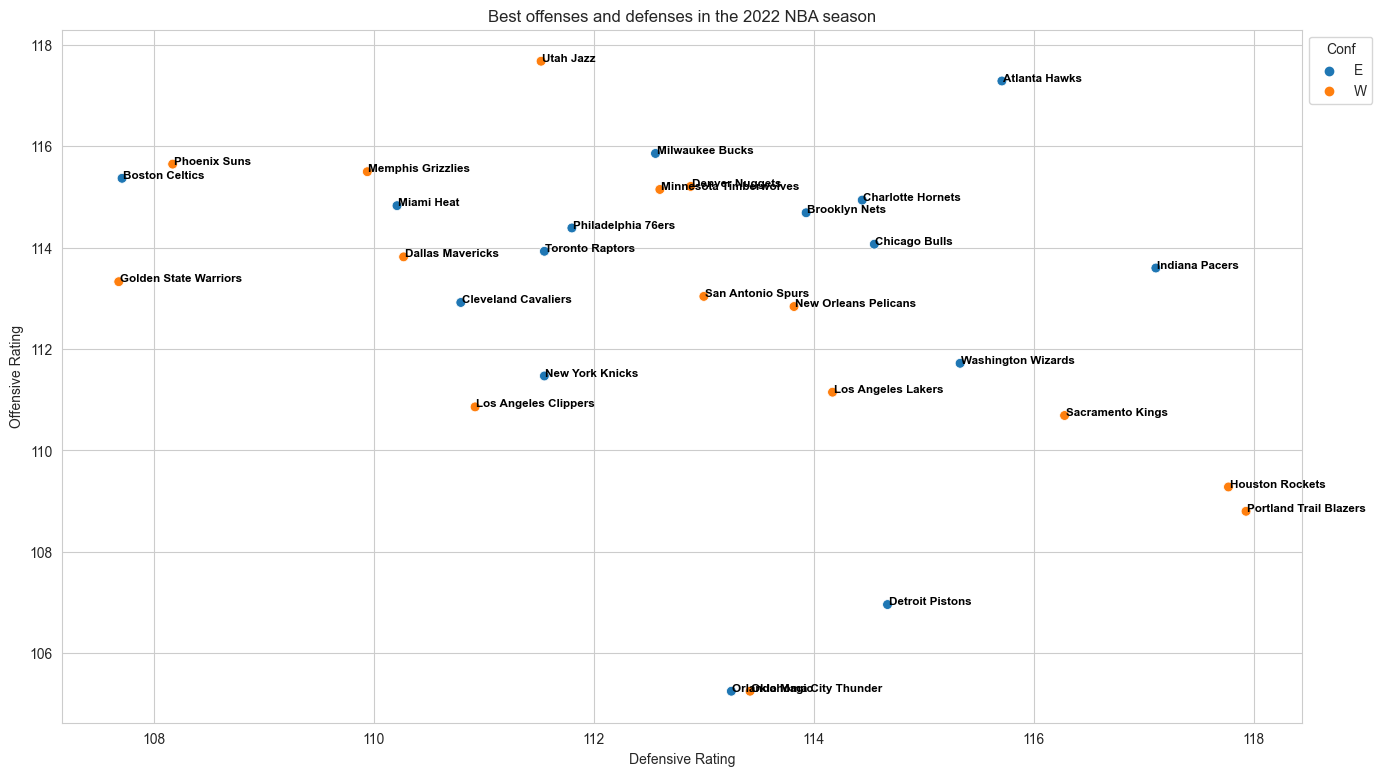

In [20]:
plt.figure(figsize=(16,9))
pt = sns.scatterplot(df_teams, y='ORtg', x='DRtg', s=50, hue='Conf')

sns.move_legend(pt, "upper left", bbox_to_anchor=(1, 1))

for line in range(0,df_teams.shape[0]):
     pt.text(df_teams.DRtg[line]+0.01, df_teams.ORtg[line], 
     df_teams.Team[line], horizontalalignment='left', 
     size='small', color='black', weight='semibold')

plt.title('Best offenses and defenses in the 2022 NBA season')
plt.xlabel('Defensive Rating')
plt.ylabel('Offensive Rating')

Remembering that it's regular season only and that the lower the defensive rating the better

In [21]:
url3 = 'https://www.basketball-reference.com/leagues/NBA_2022.html#all_per_game_team-opponent'
df_per_teams = pd.read_html(url3)[5]

df_per_teams

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Boston Celtics*,82,242.7,38.3,88.1,0.434,11.8,34.9,0.339,...,0.783,10.5,33.3,43.7,21.6,7.5,4.6,13.8,19.4,104.5
1,2.0,Dallas Mavericks*,82,240.9,39.0,85.4,0.457,10.9,32.1,0.340,...,0.767,9.5,34.1,43.6,23.5,7.0,3.7,13.1,20.1,104.7
2,3.0,Golden State Warriors*,82,240.6,37.9,86.6,0.438,12.2,36.0,0.339,...,0.759,9.7,33.0,42.6,22.9,7.9,3.9,14.5,18.0,105.5
3,4.0,Miami Heat*,82,242.1,37.5,84.0,0.447,13.0,38.3,0.339,...,0.779,9.5,32.1,41.7,23.3,7.4,4.0,15.0,20.6,105.6
4,5.0,Cleveland Cavaliers,82,240.6,39.5,87.2,0.452,11.7,33.2,0.353,...,0.774,10.5,32.4,42.9,24.1,8.4,4.6,13.4,20.0,105.7
5,6.0,New York Knicks,82,241.2,38.5,86.0,0.447,12.7,37.0,0.342,...,0.764,9.3,34.3,43.6,24.2,7.0,4.6,12.7,20.4,106.6
6,7.0,Toronto Raptors*,82,242.1,39.0,84.4,0.462,12.4,34.9,0.354,...,0.789,10.3,33.7,44.0,25.3,6.7,5.1,15.8,19.1,107.1
7,8.0,Phoenix Suns*,82,240.6,39.2,88.3,0.444,11.6,34.2,0.340,...,0.761,10.5,33.9,44.5,22.9,7.5,4.0,14.7,18.9,107.3
8,9.0,Philadelphia 76ers*,82,241.5,39.7,86.5,0.458,11.4,32.8,0.346,...,0.769,10.2,34.0,44.2,23.6,6.6,4.6,13.3,19.4,107.3
9,10.0,Utah Jazz*,82,240.6,40.4,89.2,0.453,12.1,34.6,0.350,...,0.758,9.9,31.7,41.6,23.4,7.8,4.3,12.0,20.3,107.6


In [22]:
df_per_teams.drop(30, inplace=True)

In [23]:
df_per_teams.set_index('Rk')

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1.0,Boston Celtics*,82,242.7,38.3,88.1,0.434,11.8,34.9,0.339,26.4,...,0.783,10.5,33.3,43.7,21.6,7.5,4.6,13.8,19.4,104.5
2.0,Dallas Mavericks*,82,240.9,39.0,85.4,0.457,10.9,32.1,0.340,28.1,...,0.767,9.5,34.1,43.6,23.5,7.0,3.7,13.1,20.1,104.7
3.0,Golden State Warriors*,82,240.6,37.9,86.6,0.438,12.2,36.0,0.339,25.7,...,0.759,9.7,33.0,42.6,22.9,7.9,3.9,14.5,18.0,105.5
4.0,Miami Heat*,82,242.1,37.5,84.0,0.447,13.0,38.3,0.339,24.6,...,0.779,9.5,32.1,41.7,23.3,7.4,4.0,15.0,20.6,105.6
5.0,Cleveland Cavaliers,82,240.6,39.5,87.2,0.452,11.7,33.2,0.353,27.8,...,0.774,10.5,32.4,42.9,24.1,8.4,4.6,13.4,20.0,105.7
6.0,New York Knicks,82,241.2,38.5,86.0,0.447,12.7,37.0,0.342,25.8,...,0.764,9.3,34.3,43.6,24.2,7.0,4.6,12.7,20.4,106.6
7.0,Toronto Raptors*,82,242.1,39.0,84.4,0.462,12.4,34.9,0.354,26.6,...,0.789,10.3,33.7,44.0,25.3,6.7,5.1,15.8,19.1,107.1
8.0,Phoenix Suns*,82,240.6,39.2,88.3,0.444,11.6,34.2,0.340,27.6,...,0.761,10.5,33.9,44.5,22.9,7.5,4.0,14.7,18.9,107.3
9.0,Philadelphia 76ers*,82,241.5,39.7,86.5,0.458,11.4,32.8,0.346,28.3,...,0.769,10.2,34.0,44.2,23.6,6.6,4.6,13.3,19.4,107.3


In [24]:
df_per_teams.dtypes

Rk      float64
Team     object
G         int64
MP      float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
dtype: object

### Now let's plot some per game averages

Text(0.5, 1.0, 'Average points per team')

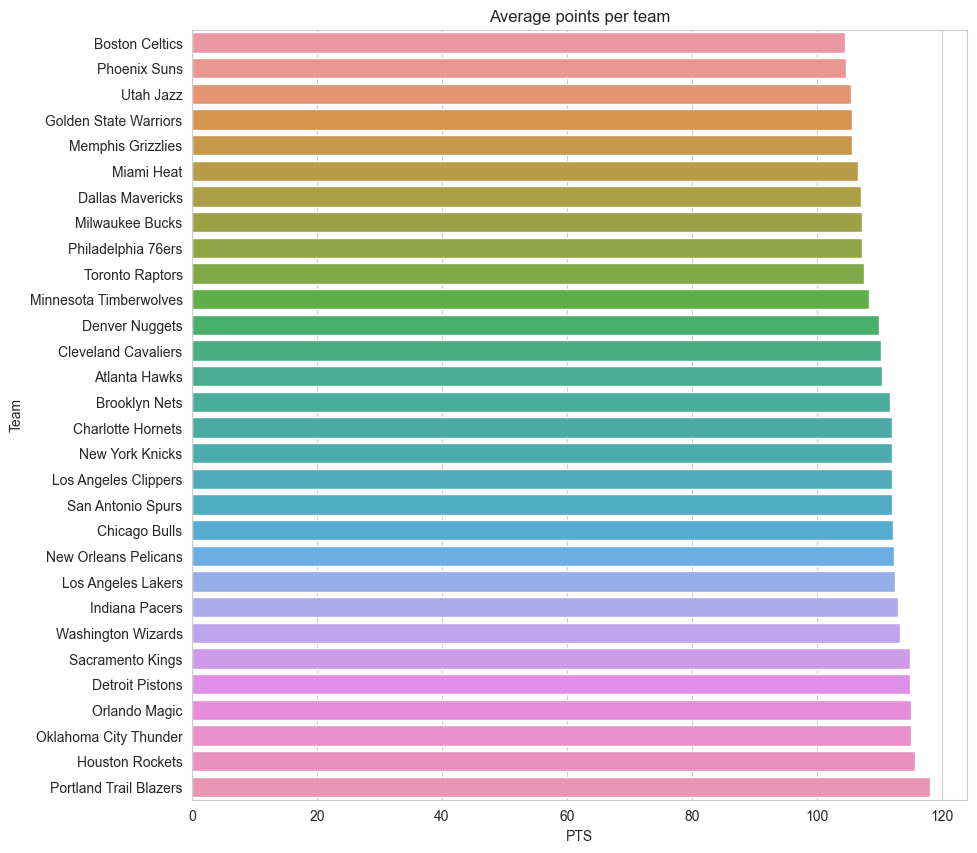

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_per_teams.PTS, y=df_teams.Team)
plt.title('Average points per team')

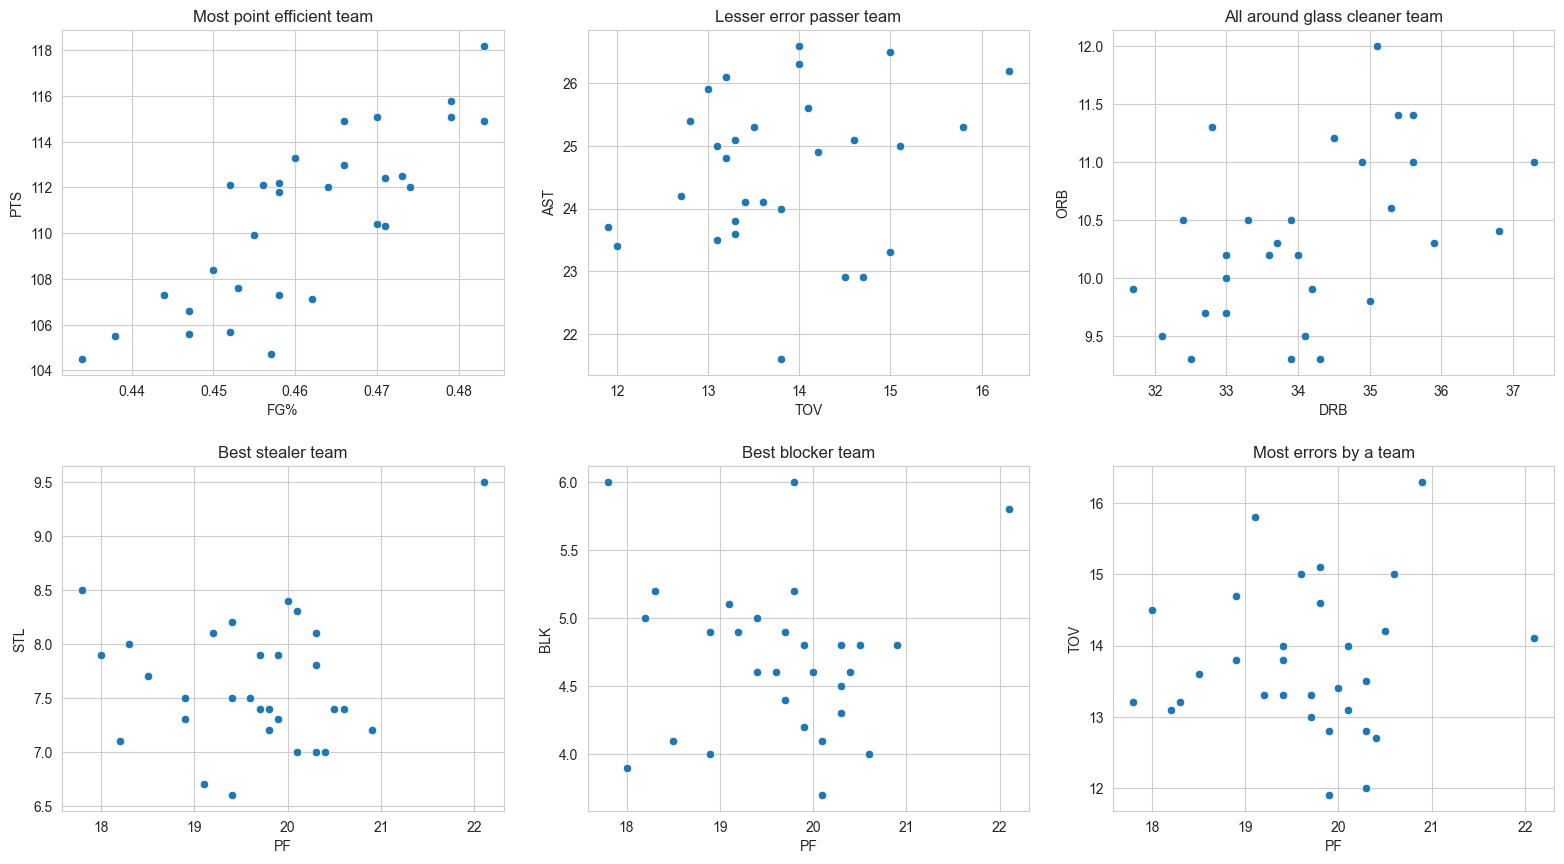

In [26]:
fig, ax = plt.subplots(2,3, figsize=(16,9))

ax[0][0].set_title('Most point efficient team')
sns.scatterplot(df_per_teams, x='FG%', y='PTS', ax=ax[0][0])

ax[0][1].set_title('Lesser error passer team')
sns.scatterplot(df_per_teams, x='TOV', y='AST', ax=ax[0][1])

ax[0][2].set_title('All around glass cleaner team')
sns.scatterplot(df_per_teams, x='DRB', y='ORB', ax=ax[0][2])

ax[1][0].set_title('Best stealer team')
sns.scatterplot(df_per_teams, x='PF', y='STL', ax=ax[1][0])

ax[1][1].set_title('Best blocker team')
sns.scatterplot(df_per_teams, x='PF', y='BLK', ax=ax[1][1])

ax[1][2].set_title('Most errors by a team')
sns.scatterplot(df_per_teams, x='PF', y='TOV', ax=ax[1][2])

plt.tight_layout(pad=2)

### There's some big outliers here compared to players

And to finish off i would like to make a heatmap to show the correlation between each statistic

Text(0.5, 1.0, 'Correlation between each NBA statistic')

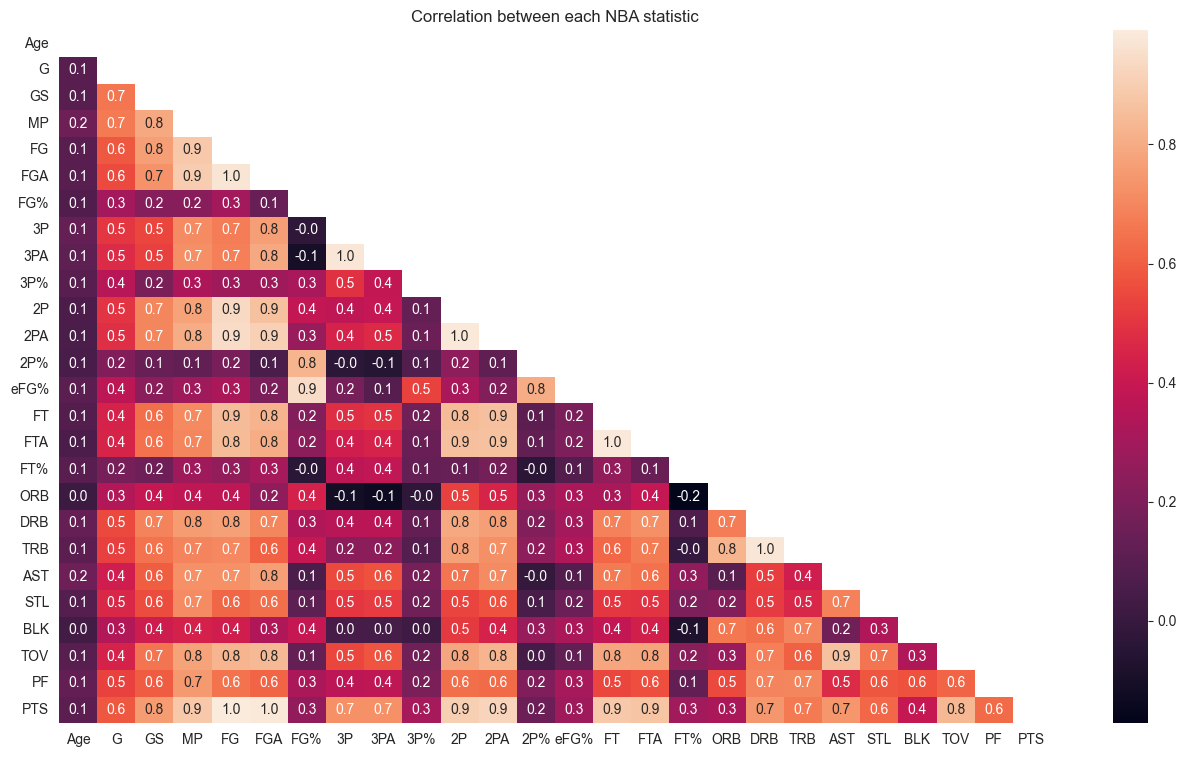

In [27]:
plt.figure(figsize=(16,9))
cols = df.columns.drop(['Player', 'Pos', 'Tm'])
corr = df[cols].corr()
mask = np.triu(df[cols].corr())
sns.heatmap(corr, fmt='.1f', annot=True, mask=mask)
plt.title('Correlation between each NBA statistic')

### In here we can see what stat affect what, the higher the number the higher the impact on each other

That's all, thanks for reading it through!